# Titanic Kaggle Comp

## Importing libraries


In [130]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Data Ingestion

In [131]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [132]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Pre-Processing 

In [133]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [134]:
x_cols = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']
x = df[x_cols]
t = test[x_cols]
y = df['Survived']

In [135]:
#checking the datatypes
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [136]:
#converting objects to float/int
x['Sex'].replace({'male':1, 'female':0} , inplace = True)
t['Sex'].replace({'male':1, 'female':0} , inplace = True)
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB
None


In [137]:
#checking for null values
x.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
dtype: int64

In [138]:
#replacing null values with mean
x['Age'].fillna(x['Age'].mean() , inplace = True)
t['Age'].fillna(t['Age'].mean() , inplace = True)

In [139]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64

## EDA

In [140]:
x.describe().T


,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0,3.000000,3.0,3.0
Sex,891.0,0.647587,0.477990,0.00,0.0,1.000000,1.0,1.0
Age,891.0,29.699118,13.002015,0.42,22.0,29.699118,35.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.000000,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.0,0.000000,0.0,6.0


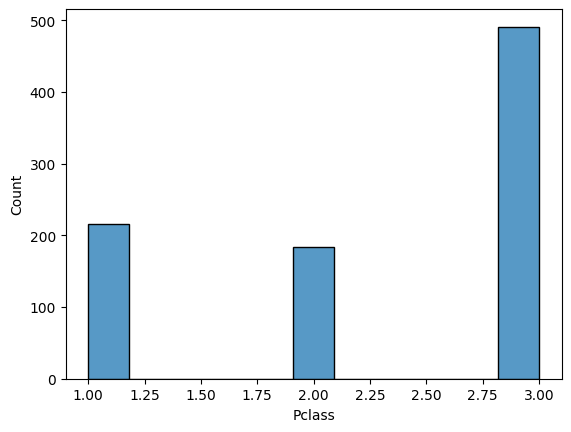

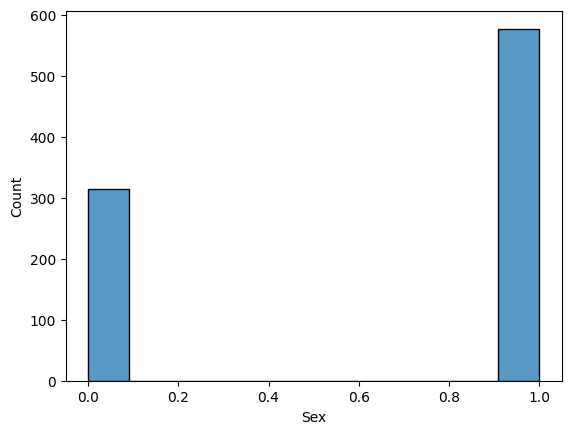

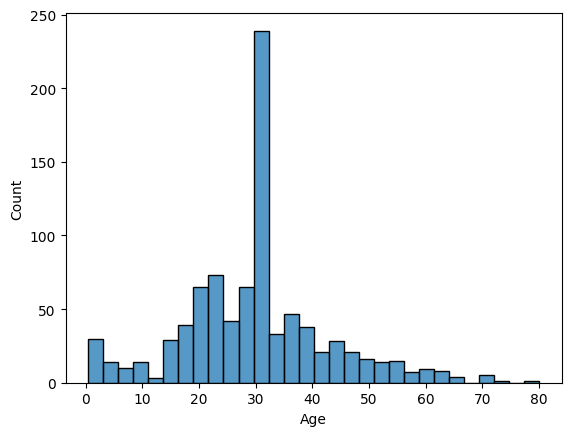

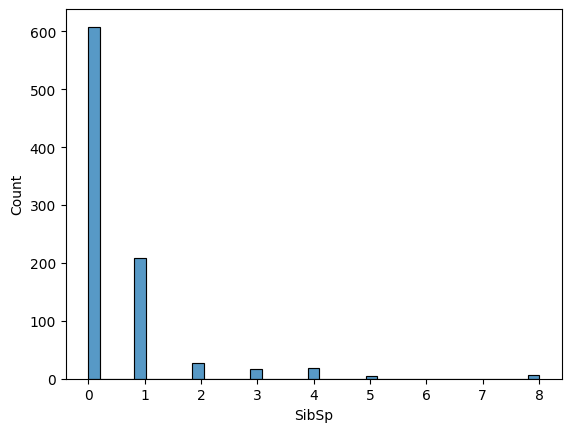

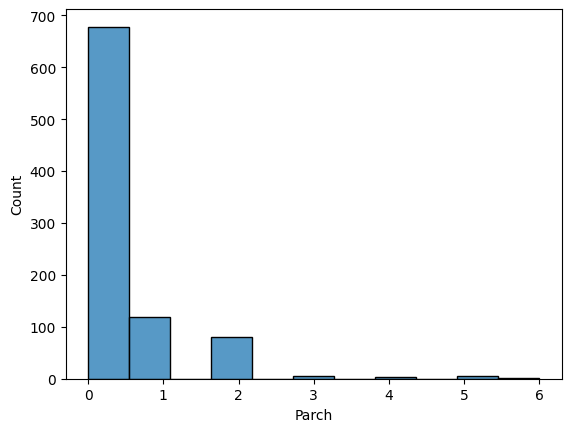

In [141]:
#Making histograms 
for i in x.columns:
    sns.histplot(data = x , x = i)
    plt.show()
    

    

# Applying logistic regression

In [142]:
#Splitting the data for training and testing
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [143]:
#Fitting the data
lr = LogisticRegression(random_state = 0)
lr.fit(x_train , y_train)

LogisticRegression(random_state=0)

In [144]:
#Finding out the accuracy
y_pred = lr.predict(x_test)
acc = lr.score(x_test , y_test)
print(acc)

0.8044692737430168


In [145]:
#Predicting outputs for the test data
test_pred = pd.DataFrame(lr.predict(t))
export = test['PassengerId']

In [146]:
#Making a df of the predictions
result = pd.concat([ export, test_pred ], axis=1)
result.columns = ['PassengerId', 'Survived']

In [147]:
#Storing it in a csv file
result.to_csv('fnalsubmission.csv', index=False)
